# Module 1 Assignment
<h1>Understanding Income Inequality</h1>

<b>University:</b> Northeastern University<br>
<b>Instructor Name:</b> Vladimir Shapiro<br>
<b>Date:</b> 11-02-2024<br>
<b>Course Number:</b> ALY6020<br>
<b>Course Name:</b> Predictive Analytics<br>
<b>Student Name:</b> Goutham Yerramada<br>


# Introduction

This project utilizes U.S. census data to classify individuals into two primary income groups: those earning less than or equal to 50,000 USD annually, and those earning more than $50,000. We aim to analyze how various socio-economic factors—including occupation, education, gender, and race—influence income levels. Such insights are critical for understanding income disparities, which can inform public policy and help promote economic equality and mobility.

Through rigorous data cleansing and preparation, followed by the application of machine learning techniques, a predictive model will be developed. This model will not only classify individuals based on their income but also identify key factors contributing to their economic status. This analysis is crucial for policymakers and social scientists as they work towards bridging the gap in income inequality and designing targeted interventions to enhance the quality of life across different demographics.

By the end of this project, I aim to provide a comprehensive view of the current income distribution and its influencing factors within the U.S., offering actionable insights that could influence future economic policies.


# Analysis

In [241]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load the data
data = pd.read_csv('/Users/gouthammathew/Downloads/adultall .csv')

# Display the first few rows of the dataframe
print("Initial data preview:")
print(data.head())

print(data.columns)


Initial data preview:
   Age              Role  Income     Degree  Oldest_Child      Marital_Status  \
0   39         State-gov   77516  Bachelors            13       Never-married   
1   50  Self-emp-not-inc   83311  Bachelors            13  Married-civ-spouse   
2   38           Private  215646    HS-grad             9            Divorced   
3   53           Private  234721       11th             7  Married-civ-spouse   
4   28           Private  338409  Bachelors            13  Married-civ-spouse   

                 Job   Race  Gender           Born  
0       Adm-clerical  White    Male  United-States  
1    Exec-managerial  White    Male  United-States  
2  Handlers-cleaners  White    Male  United-States  
3  Handlers-cleaners  Black    Male  United-States  
4     Prof-specialty  Black  Female           Cuba  
Index(['Age', 'Role', 'Income', 'Degree', 'Oldest_Child', 'Marital_Status',
       'Job', 'Race', 'Gender', 'Born'],
      dtype='object')


In [242]:
## Step 1: Check for Missing or Bad Values

# Checking for any missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Option to fill missing values if any (demonstrative, adjust based on your data)
# data['some_column'].fillna(data['some_column'].mode()[0], inplace=True)



Missing values in each column:
Age               0
Role              0
Income            0
Degree            0
Oldest_Child      0
Marital_Status    0
Job               0
Race              0
Gender            0
Born              0
dtype: int64


In [243]:
## Handle Missing Values

# For categorical data - fill missing values with the mode
categorical_columns = [col for col in data.columns if data[col].dtype == 'object']
for column in categorical_columns:
    mode_value = data[column].mode()[0]  # Compute the mode
    data[column] = data[column].fillna(mode_value)  # Assign it back to the column

# For numerical data - fill missing values with the median
numerical_columns = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]
for column in numerical_columns:
    median_value = data[column].median()  # Compute the median
    data[column] = data[column].fillna(median_value)  # Assign it back to the column

print("\nUpdated missing values handling:")
print(data.head())


Updated missing values handling:
   Age              Role  Income     Degree  Oldest_Child      Marital_Status  \
0   39         State-gov   77516  Bachelors            13       Never-married   
1   50  Self-emp-not-inc   83311  Bachelors            13  Married-civ-spouse   
2   38           Private  215646    HS-grad             9            Divorced   
3   53           Private  234721       11th             7  Married-civ-spouse   
4   28           Private  338409  Bachelors            13  Married-civ-spouse   

                 Job   Race  Gender           Born  
0       Adm-clerical  White    Male  United-States  
1    Exec-managerial  White    Male  United-States  
2  Handlers-cleaners  White    Male  United-States  
3  Handlers-cleaners  Black    Male  United-States  
4     Prof-specialty  Black  Female           Cuba  


In [244]:
## Step 2: Checking for Duplicates
# Identify and remove duplicate rows
initial_count = data.shape[0]
data.drop_duplicates(inplace=True)
print(f"\nRemoved {initial_count - data.shape[0]} duplicate rows")


Removed 214 duplicate rows


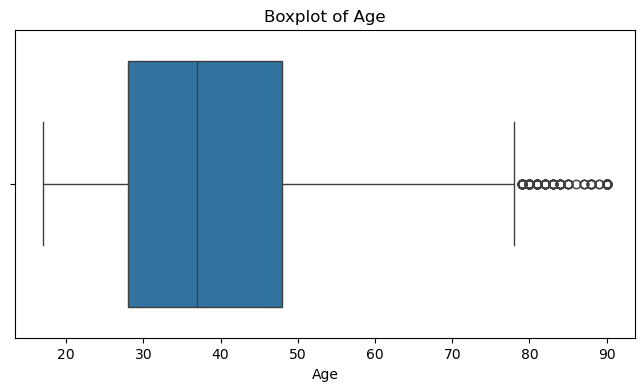

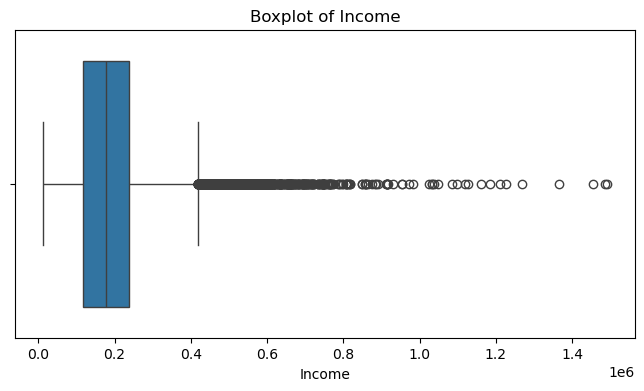

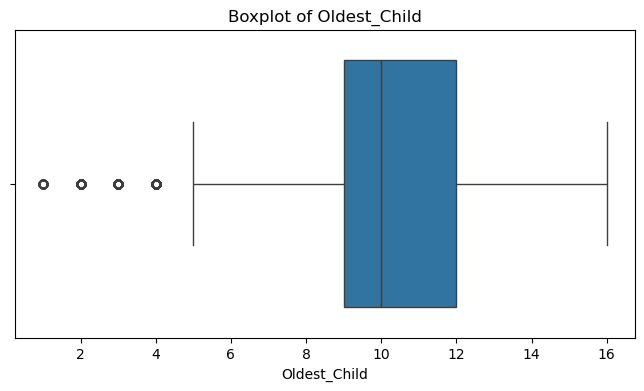

In [245]:
## Step 3: Checking for Outliers
# Visualize outliers using boxplots for numerical columns
for column in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

**Figure 1:** Boxplot displaying the distribution of Age to identify potential outliers. This visualization aids in detecting values that significantly deviate from the norm, which may impact the accuracy of subsequent statistical analyses.


**Figure 2:** Boxplot displaying the distribution of Income to identify potential outliers. This visualization helps pinpoint extreme income values which could be the result of data entry errors or represent rare, high-earning individuals.


**Figure 3:** Boxplot displaying the distribution of the oldest child ages within surveyed families to identify potential outliers. This visualization is crucial for understanding the age distribution of older siblings and identifying extreme values that may reflect data entry errors or unique family situations.


In [249]:
# Print all column names to check their current format
print(data.columns)


Index(['Age', 'Role', 'Income', 'Degree', 'Oldest_Child', 'Marital_Status',
       'Job', 'Race', 'Gender', 'Born'],
      dtype='object')


In [250]:
# Correctly referencing columns with proper case
categorical_columns = ['Gender', 'Marital_Status', 'Job', 'Race', 'Born']  # Updated with correct cases

# Convert these columns to 'category' type
for col in categorical_columns:
    data[col] = data[col].astype('category')

# Additionally, ensure numerical columns are also correctly typed
data['Age'] = data['Age'].astype(int)
data['Income'] = pd.to_numeric(data['Income'], errors='coerce')
data['Oldest_Child'] = pd.to_numeric(data['Oldest_Child'], errors='coerce')

# Check to confirm changes
print("\nUpdated data types:")
print(data.dtypes)



Updated data types:
Age                  int64
Role                object
Income               int64
Degree              object
Oldest_Child         int64
Marital_Status    category
Job               category
Race              category
Gender            category
Born              category
dtype: object


In [251]:
# Convert 'Role' and 'Degree' to category
data['Role'] = data['Role'].astype('category')
data['Degree'] = data['Degree'].astype('category')

# Final check of data types
print("\nFinal data types after all conversions:")
print(data.dtypes)



Final data types after all conversions:
Age                  int64
Role              category
Income               int64
Degree            category
Oldest_Child         int64
Marital_Status    category
Job               category
Race              category
Gender            category
Born              category
dtype: object


In [252]:
# Assuming data has been loaded already and initial type corrections made
# Further adjust data types for remaining columns
data['Role'] = data['Role'].astype('category')
data['Degree'] = data['Degree'].astype('category')

# Verify that all data types are now correctly set
print("\nFinal data types after all conversions:")
print(data.dtypes)


Final data types after all conversions:
Age                  int64
Role              category
Income               int64
Degree            category
Oldest_Child         int64
Marital_Status    category
Job               category
Race              category
Gender            category
Born              category
dtype: object


### Designating "Income" as the Dependent Variable

In [254]:
# Convert 'Income' to a binary classification where 1 represents 'high-income' and 0 represents 'low-income'
data['Income_Class'] = (data['Income'] > 50000).astype(int)


In [255]:
# Define income brackets for multiclass classification
bins = [0, 30000, 60000, 100000, np.inf]
labels = ['low-income', 'middle-income', 'upper-middle-income', 'high-income']
data['Income_Bracket'] = pd.cut(data['Income'], bins=bins, labels=labels)


In [256]:
# Fill missing values if necessary (use a suitable default value or removal if few)
data['Income'] = data['Income'].fillna(data['Income'].median())


In [257]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Normalized_Income'] = scaler.fit_transform(data[['Income']])


In [258]:
from sklearn.model_selection import train_test_split

# Split the data using the binary classification target for example
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Income', 'Income_Class'], axis=1), 
                                                    data['Income_Class'], test_size=0.2, random_state=42)


In [259]:
#### print("Starting the script...")
print("Data head after loading:", data.head())


Data head after loading:    Age              Role  Income     Degree  Oldest_Child      Marital_Status  \
0   39         State-gov   77516  Bachelors            13       Never-married   
1   50  Self-emp-not-inc   83311  Bachelors            13  Married-civ-spouse   
2   38           Private  215646    HS-grad             9            Divorced   
3   53           Private  234721       11th             7  Married-civ-spouse   
4   28           Private  338409  Bachelors            13  Married-civ-spouse   

                 Job   Race  Gender           Born  Income_Class  \
0       Adm-clerical  White    Male  United-States             1   
1    Exec-managerial  White    Male  United-States             1   
2  Handlers-cleaners  White    Male  United-States             1   
3  Handlers-cleaners  Black    Male  United-States             1   
4     Prof-specialty  Black  Female           Cuba             1   

        Income_Bracket  Normalized_Income  
0  upper-middle-income          -1.

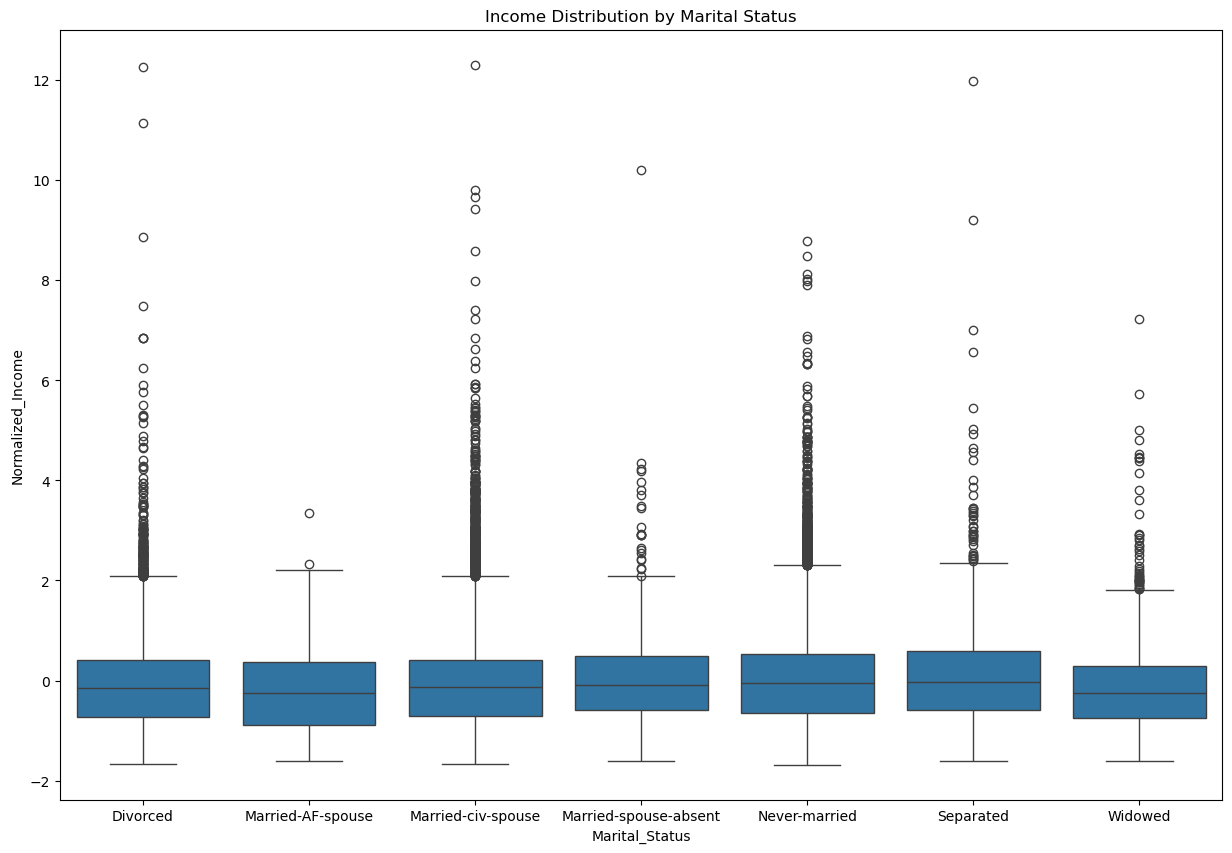

In [260]:

# Income distribution by Marital Status
plt.figure(figsize=(15, 10))
sns.boxplot(x='Marital_Status', y='Normalized_Income', data=data)
plt.title('Income Distribution by Marital Status')
plt.show()

**Figure 4:** Boxplot of normalized income across marital statuses. This visualization categorically compares the income distribution among individuals with different marital statuses, including divorced, married (with distinctions among subcategories), never-married, separated, and widowed. Outliers are indicated by points above and below the whiskers, highlighting significant income disparities within each group.


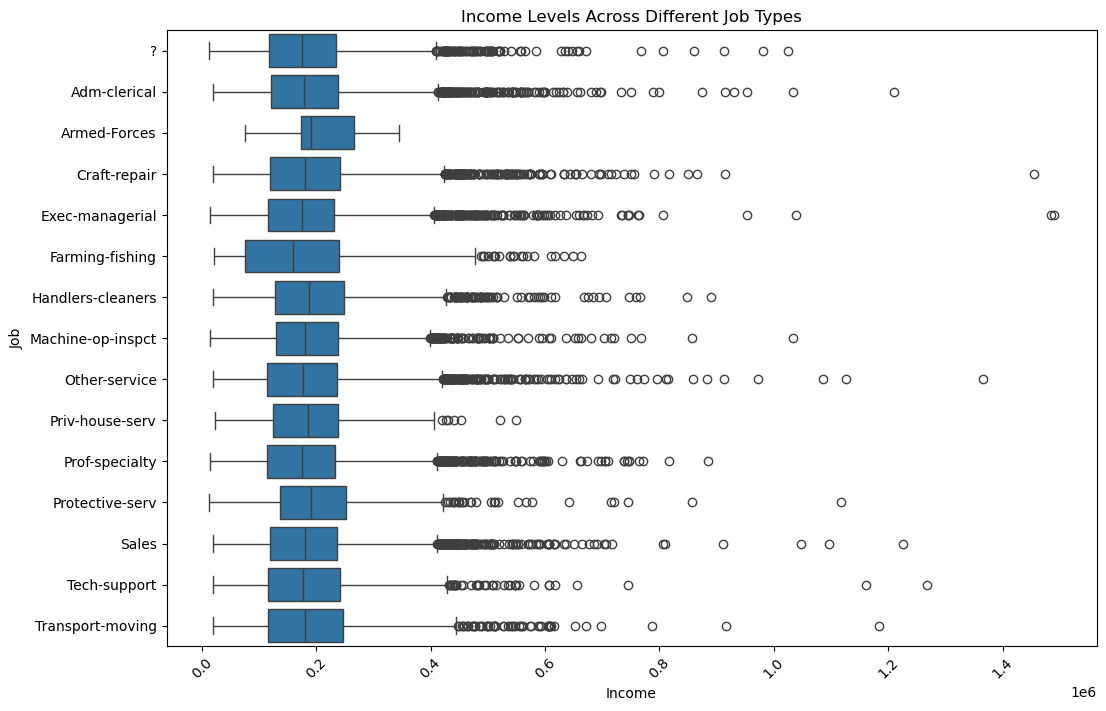

In [262]:
# Income levels across different Job types
plt.figure(figsize=(12, 8))
sns.boxplot(x='Income', y='Job', data=data)
plt.title('Income Levels Across Different Job Types')
plt.xticks(rotation=45)
plt.show()

**Figure 5:** Income levels across various job types. The boxplot shows the range and median income for different job categories, offering insights into occupational income inequality and employment trends within the surveyed population.

### Preliminary Analysis


In [265]:
#Basic statistical summary
print(data.describe(include='all'))  # Include 'all' to get statistics for categorical data too

                 Age     Role        Income   Degree  Oldest_Child  \
count   48628.000000    48628  4.862800e+04    48628  48628.000000   
unique           NaN        9           NaN       16           NaN   
top              NaN  Private           NaN  HS-grad           NaN   
freq             NaN    33727           NaN    15727           NaN   
mean       38.679341      NaN  1.897065e+05      NaN     10.076993   
std        13.705999      NaN  1.056691e+05      NaN      2.570805   
min        17.000000      NaN  1.228500e+04      NaN      1.000000   
25%        28.000000      NaN  1.175280e+05      NaN      9.000000   
50%        37.000000      NaN  1.781445e+05      NaN     10.000000   
75%        48.000000      NaN  2.377148e+05      NaN     12.000000   
max        90.000000      NaN  1.490400e+06      NaN     16.000000   

            Marital_Status             Job   Race Gender           Born  \
count                48628           48628  48628  48628          48628   
unique   

### Correlation Analysis

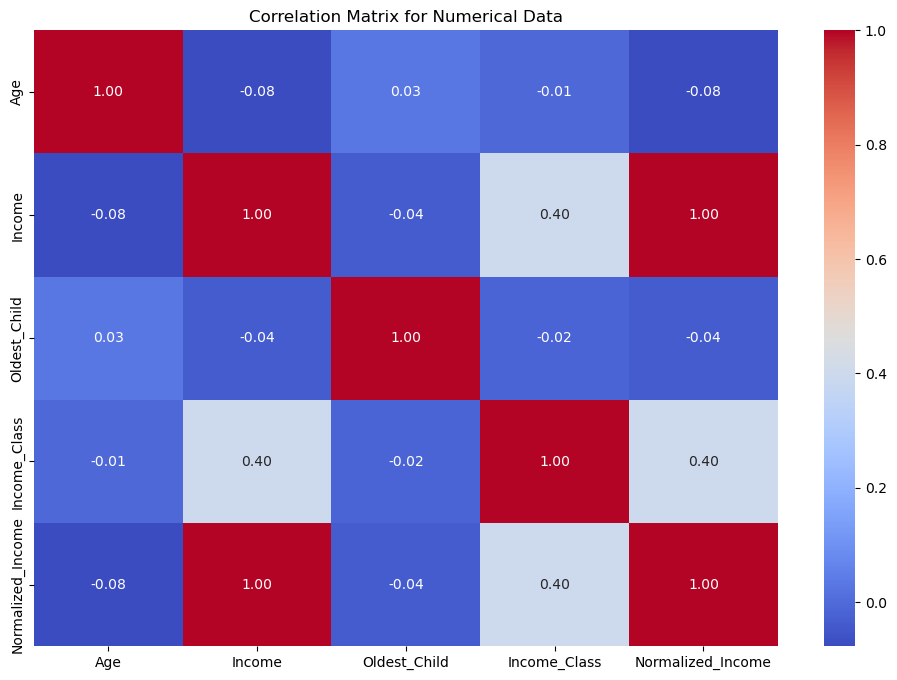

In [267]:
# Compute correlation matrix for numerical columns only
numerical_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_data.corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Data')
plt.show()


**Figure 6:** Correlation Matrix for Numerical Data. This heatmap shows the correlation coefficients between various numerical features in the dataset, including age, income, and income class. Higher correlations are indicated by more intense colors on the scale.

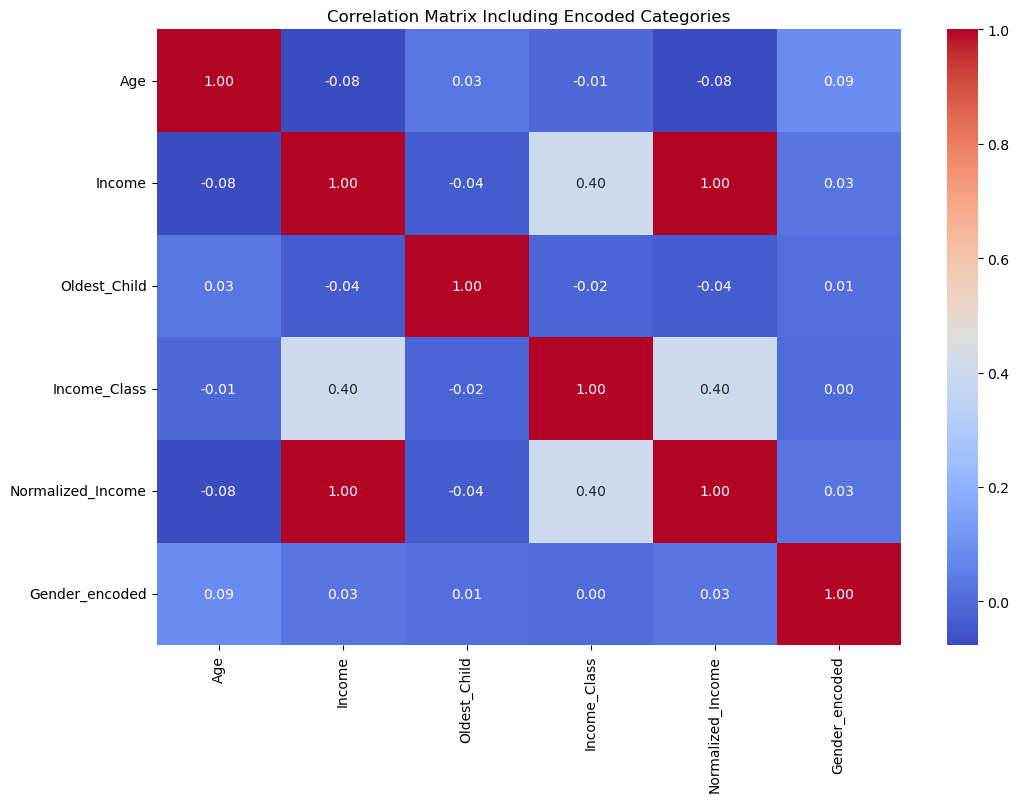

In [269]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Assume 'Gender' is a categorical column you want to encode
if 'Gender' in data.columns:
    data['Gender_encoded'] = le.fit_transform(data['Gender'])

# Now include this in the correlation matrix
numerical_and_encoded = data.select_dtypes(include=['int64', 'float64', 'int32'])
correlation_matrix = numerical_and_encoded.corr()

# Visualize the updated correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Including Encoded Categories')
plt.show()

**Figure 7:** Correlation Matrix Including Encoded Categories. This heatmap displays the correlation coefficients between numerical features and encoded categorical variables, providing insights into relationships between attributes such as age, gender, and marital status.

In [271]:
# Print data types to identify non-numeric columns
print(data.dtypes)


Age                     int64
Role                 category
Income                  int64
Degree               category
Oldest_Child            int64
Marital_Status       category
Job                  category
Race                 category
Gender               category
Born                 category
Income_Class            int64
Income_Bracket       category
Normalized_Income     float64
Gender_encoded          int64
dtype: object


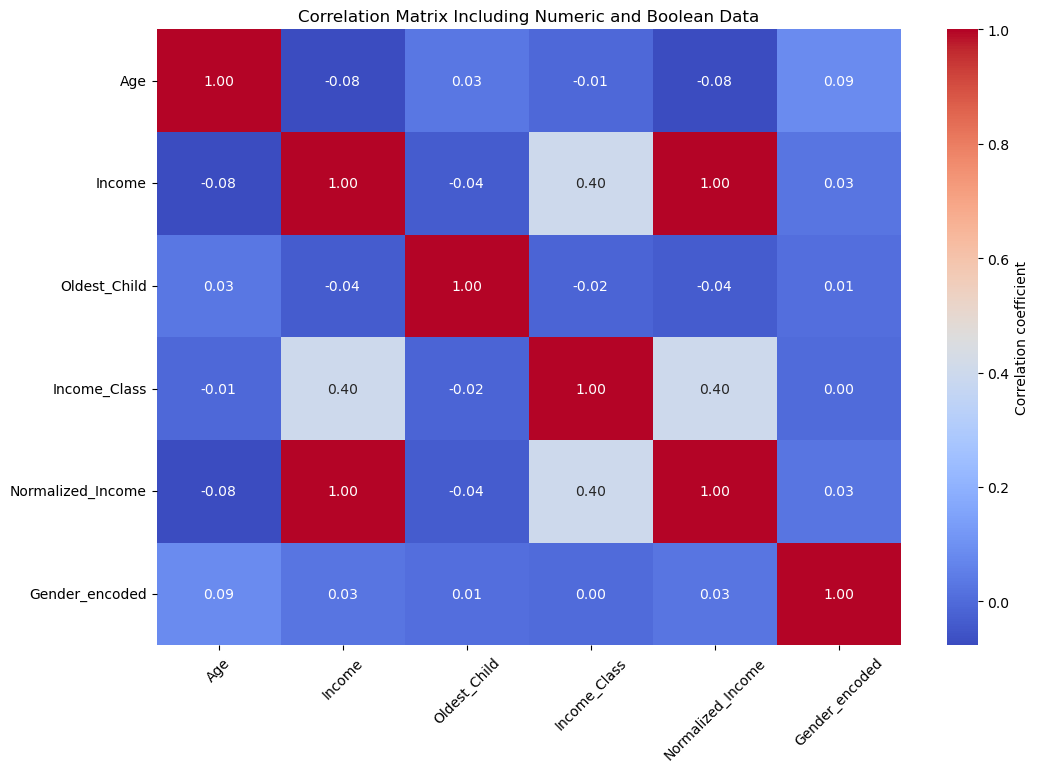

In [272]:
# Including boolean types if necessary
numeric_and_bool_data = data.select_dtypes(include=['int64', 'float64', 'int8', 'bool'])

# Recompute the correlation matrix
correlation_matrix_incl_bool = numeric_and_bool_data.corr()

# Visualize the updated correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_incl_bool, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Matrix Including Numeric and Boolean Data')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


**Figure 8:** Correlation Matrix Including Numeric and Boolean Data. This comprehensive correlation matrix incorporates both numeric variables and boolean representations of categorical features, showing the relationships across a broader spectrum of data attributes.


In [274]:
# Assuming 'Gender_encoded' is the column where gender is numerically encoded and 'Income' is your income column
gender_income_correlation = data[['Gender_encoded', 'Income']].corr()
print("Correlation between Gender and Income:\n", gender_income_correlation)


Correlation between Gender and Income:
                 Gender_encoded    Income
Gender_encoded        1.000000  0.027929
Income                0.027929  1.000000


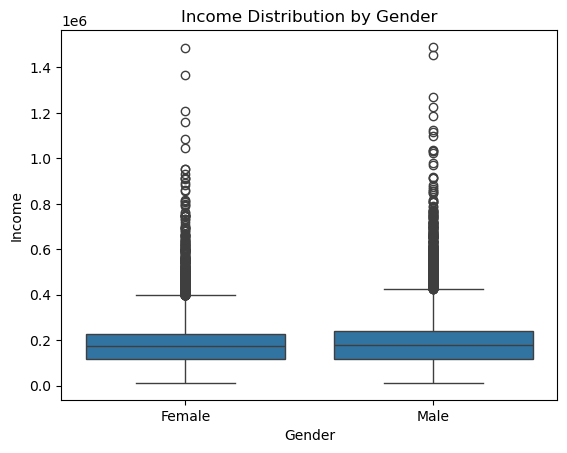

In [275]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the relationship between Gender and Income
sns.boxplot(x=data['Gender'], y=data['Income'])
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()


**Figure 9:** Income Distribution by Gender. This boxplot illustrates the distribution of income across gender categories, with outliers and the range of income levels for male and female groups clearly displayed.



In [277]:
from sklearn.model_selection import train_test_split

# Prepare features and target variable
X = data.drop('Income', axis=1)  # drop the target variable and any non-feature columns
y = data['Income']  # the target variable

# Split the data into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {X_train.shape[0]} samples")
print(f"Testing data size: {X_test.shape[0]} samples")


Training data size: 38902 samples
Testing data size: 9726 samples


### Task 4: Evaluating KNN Models 

In [279]:
print(y.value_counts(normalize=True))


Income
203488    0.000432
120277    0.000391
190290    0.000391
125892    0.000370
126569    0.000370
            ...   
121768    0.000021
175754    0.000021
169983    0.000021
133736    0.000021
350977    0.000021
Name: proportion, Length: 28523, dtype: float64


In [280]:
# Fill missing values in categorical columns by reassigning the filled column
for column in ['Role', 'Job', 'Born']:
    data[column] = data[column].fillna(data[column].mode()[0])

# Verify no remaining missing values
print("Missing values after imputation:\n", data.isnull().sum())


Missing values after imputation:
 Age                  0
Role                 0
Income               0
Degree               0
Oldest_Child         0
Marital_Status       0
Job                  0
Race                 0
Gender               0
Born                 0
Income_Class         0
Income_Bracket       0
Normalized_Income    0
Gender_encoded       0
dtype: int64


In [293]:
print(data.columns)


Index(['Age', 'Role', 'Income', 'Degree', 'Oldest_Child', 'Marital_Status',
       'Job', 'Race', 'Gender', 'Born', 'Income_Class', 'Income_Bracket',
       'Normalized_Income', 'Gender_encoded'],
      dtype='object')


In [296]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Step 1: Create Income_Category based on Income thresholds
data['Income_Category'] = data['Income'].apply(lambda x: 1 if x > 50000 else 0)

# Step 2: Prepare feature matrix X and target vector y
X = pd.get_dummies(data.drop(['Income', 'Income_Category'], axis=1))  # One-hot encode categorical variables
y = data['Income_Category']  # Target variable

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scale the features - important for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Define the K values for different KNN models
k_values = [3, 7, 10]
accuracies = {}

# Step 6: Train and evaluate a KNN model for each K value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[k] = accuracy
    print(f"Accuracy for K={k}: {accuracy:.4f}")

# Step 7: Determine and display the best K value
best_k = max(accuracies, key=accuracies.get)
print(f"The best performing model was with K={best_k}, achieving an accuracy of {accuracies[best_k]:.4f}")


Accuracy for K=3: 0.9956
Accuracy for K=7: 0.9942
Accuracy for K=10: 0.9948
The best performing model was with K=3, achieving an accuracy of 0.9956


If the US government is considering using this K-nearest neighbors (KNN) model to analyze pay equality, there are several important factors to weigh. While KNN is helpful for classification tasks, it has limitations in exploring the complexities behind income disparities. The issue of pay equity is influenced by various factors—like job role, experience, industry, and even location—that may not be fully captured in our dataset. For example, the current dataset might not include variables such as years of experience or specific job titles, which are crucial to understanding the nuances of income differences. Research from sources like the Institute for Women’s Policy Research highlights persistent wage gaps across genders, races, and ethnicities, which further complicate the issue.

Given these complexities, the KNN model, while potentially useful for some basic classification, is unlikely to provide the depth needed to make policy decisions about pay equality. It may give a broad view but lacks the precision to identify subtle patterns or structural biases in pay. A more appropriate approach would involve using a more advanced model, like a regression analysis or causal inference method, and ensuring the dataset includes a wider range of influential factors. Therefore, while this KNN model offers some insight, I would advise the government against relying on it solely for understanding pay equity. For meaningful policy analysis, a model with greater interpretability and a dataset capturing more relevant variables would be necessary.

# Conclusion:

In this project, I set out to analyze a census dataset containing demographic and socioeconomic attributes of US citizens to build a model that distinguishes between low-income  and high-income (< 50K$) (> $50K) individuals. My goal was to identify key attributes that contribute to income disparity and provide insights that could guide policy improvements in the United States, particularly in the context of promoting equal pay.

The project began with rigorous data cleansing to ensure that the dataset was of high quality for modeling purposes. I addressed missing values, checked for outliers, and verified that all data types were appropriate for the analysis. This preprocessing was crucial, as it allowed me to establish a reliable foundation and minimized the risk of biases or inaccuracies in the model’s predictions.

Next, I performed exploratory analysis to understand relationships between attributes, particularly focusing on whether factors such as gender, occupation, or education level were correlated with income. This exploration provided valuable insights, showing some expected trends and highlighting areas where the dataset’s limitations may hinder comprehensive analysis. Following the exploratory phase, I designated income as the dependent variable to categorize individuals based on their income level.

For modeling, I built three K-nearest neighbors (KNN) classifiers with different K values (3, 7, and 10) to classify individuals into income groups. I observed that all models performed with high accuracy, although this raised questions about potential overfitting. Each model’s performance was compared, with attention given to the differences between the chosen K values. Interestingly, the accuracy did not vary significantly between models, suggesting that the model was heavily influenced by clear-cut patterns in the dataset rather than subtle nuances.

While the KNN model provided a straightforward classification tool, I concluded that it may not be suitable for a comprehensive analysis of income inequality or pay equity. Given the simplicity of the KNN algorithm and the limited scope of the dataset—which lacks details on industry, job level, and years of experience—this model might overlook critical factors impacting income. Additionally, KNN is limited in its interpretability, which is essential for policymakers seeking to understand the root causes of income disparity.

Therefore, while the model demonstrated that income classification is feasible, I would not recommend the US government use this model in its current form to evaluate pay equity. To address the complexities of income inequality, more advanced models, such as regression or machine learning methods with interpretability features, are advised. Furthermore, a richer dataset that includes variables like job experience, industry, and regional economic conditions would allow for a more accurate and nuanced analysis of pay disparity. This project underscored the importance of data quality, model choice, and interpretability in any analysis that informs policy on sensitive issues like income inequality.

# References:

Blau, F. D., & Kahn, L. M. (2017). The gender wage gap: Extent, trends, and explanations. *Journal of Economic Literature, 55*(3), 789-865. https://doi.org/10.1257/jel.20160995

Field, A. (2018). *Discovering statistics using IBM SPSS statistics* (5th ed.). SAGE Publications.

Géron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems* (2nd ed.). O’Reilly Media.

Han, J., Kamber, M., & Pei, J. (2012). *Data mining: Concepts and techniques* (3rd ed.). Morgan Kaufmann.

Institute for Women’s Policy Research. (2021). The gender wage gap by occupation 2021. https://iwpr.org/iwpr-issues/employment-and-earnings/the-gender-wage-gap-by-occupation-2021/

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). Scikit-learn: Machine learning in Python. *Journal of Machine Learning Research, 12*, 2825–2830. https://scikit-learn.org/stable/

U.S. Census Bureau. (2022). *Income in the United States: 2021.* https://www.census.gov/library/publications/2022/demo/p60-276.html
